In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import matplotlib as mpl
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False
rc("font", family="AppleGothic")
get_ipython().run_line_magic("matplotlib", "inline")

In [2]:
data = pd.read_excel("reviews_concat.xlsx", index_col=0)
data

,platform,store,date,review,rating,category,label
0,mustit,google,20230914,굿,5,만족도&기타,1
1,balaan,google,20230914,자주 이용하지는 않지만 기분전환으로 조그만거 하나씩 사고 있어요,5,만족도&기타,1
2,balaan,google,20230914,가격이 싸니까 직접 포장해서 줘요,5,가격&프로모션,1
3,balaan,google,20230914,포장이 안돼서 오는게 좀 그렇지만,5,상품 품질,0
4,balaan,google,20230914,앱깔고 눈팅만 하다가 전부터 사고싶던게 특가로 떠서 샀어요,5,가격&프로모션,1
...,...,...,...,...,...,...,...
13361,mustit,google,20141028,좋아요,5,만족도&기타,1
13362,mustit,google,20140805,너무 좋아요,5,만족도&기타,1
13363,mustit,google,20140703,좋습니다,5,만족도&기타,1
13364,mustit,google,20140530,좋아요,5,만족도&기타,1


In [3]:
# 트렌비
data_ne = data[data["label"]== 0 ]
data_ne

,platform,store,date,review,rating,category,label
3,balaan,google,20230914,포장이 안돼서 오는게 좀 그렇지만,5,상품 품질,0
22,trenbe,apple,20230913,렉이 넘 심해요,3,앱 오류,0
23,trenbe,apple,20230913,다시 처음부터 봐야하는데 이게 너무 불편해요,3,UX/UI 편의성,0
24,trenbe,apple,20230913,상품 하나 구경하고 뒤로가기하면 렉걸려서,3,앱 오류,0
30,balaan,google,20230912,배송이 좀 늦어져서 짜증낫었는데,5,배송,0
...,...,...,...,...,...,...,...
12811,balaan,google,20210426,최악이네요,1,만족도&기타,0
12836,trenbe,google,20210321,최악이네요,1,만족도&기타,0
12869,trenbe,google,20210216,배송이 넘 느려요,1,배송,0
12894,balaan,google,20210103,최악입니다,1,만족도&기타,0


# 트렌비
- 트렌비의 부정 비율을 보면 2021.08~2022.01 이 기간동안 전체 리뷰 개수와 상관없이 부정 리뷰 개수는 비슷함.
- ?? 긍정적인 리뷰도 많아졌지만 부정 리뷰 개수가 비슷한 것으로 보아 개선하지 않았나? 의문
- 특히 2021년 8월 전에는 부정 리뷰가 50개를 넘지 않았는데 2021.08에 처음으로 100개를 돌파.
- 이 기간의 부정 리뷰 카테고리 비율을 보고 탑 3를 태블로로 확인함.
- 앱 오류가 지나치게 높은 달 2021.08/2021.10 앱 오류는 앱 관련 리뷰일테고 (워클로 키워드보면서 확실하게 봐야 함.)
- 만족도기타와 고객센터 부분은 워클 키워드를 보며 어떤 부분이 불만족스러운지 확인 필요
- 앱 오류가 탑 3에 포함된 달을 보면 만족도 기타와 고객센터는 계속 비슷한 개수 유지.(아마도 개선하지 않았다?)
- 2021.12~2022.01 고객센터와 가격이 함께 탑 3이다? 이벤트 과정에서 무슨 일이 있는 듯 (워클로 키워드 확인)
    - 워클 키워드 확인 (앱오류 2021.08/2021.10   만족도,고객 2021.08_2021.11   고객,가격 2021.12~2022.01)

In [4]:
# 트렌비
trenbe = data_ne[data_ne["platform"]=='trenbe']
trenbe

,platform,store,date,review,rating,category,label
22,trenbe,apple,20230913,렉이 넘 심해요,3,앱 오류,0
23,trenbe,apple,20230913,다시 처음부터 봐야하는데 이게 너무 불편해요,3,UX/UI 편의성,0
24,trenbe,apple,20230913,상품 하나 구경하고 뒤로가기하면 렉걸려서,3,앱 오류,0
42,trenbe,google,20230912,욕이 아까울정도로 무책임 무성의 무대응 고객을 아주 으로 아는곳,1,고객센터,0
71,trenbe,google,20230911,요새들어 로딩이 느려지고 렉도 잘걸려서 화면이 정지가 되어있구 앱사용시 핸드폰에 발...,1,앱 오류,0
...,...,...,...,...,...,...,...
12799,trenbe,apple,20210516,너무느려요,1,앱 오류,0
12809,trenbe,google,20210429,너무 느려요,3,앱 오류,0
12836,trenbe,google,20210321,최악이네요,1,만족도&기타,0
12869,trenbe,google,20210216,배송이 넘 느려요,1,배송,0


In [5]:
trenbe['date']=trenbe['date'].astype(str)

/var/folders/58/gn_xg82n3_d5871yqsk64tm40000gn/T/ipykernel_5080/3754854654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trenbe['date']=trenbe['date'].astype(str)


### 트렌비 2021.08
- 앱 오류가 지나치가 많음

In [6]:
trenbe_2021_08 = trenbe[trenbe['date'].str.contains('202108')]
trenbe_2021_08

,platform,store,date,review,rating,category,label
6241,trenbe,google,20210831,업데이트하고 나서 정말 느려졌어요. 그전 버전이 훨 빠르고 좋아요.ㅠㅠ,2,앱 오류,0
6245,trenbe,google,20210830,아 쇼핑 하는데 너무 답답해요 계속 화면 멈추고,2,앱 오류,0
6246,trenbe,google,20210830,앱이자꾸멈추고안되는데 물건을어째사죠?,1,앱 오류,0
6247,trenbe,google,20210830,렉 심해요,2,앱 오류,0
6248,trenbe,google,20210830,렉이 진짜 심하네요 ㅠㅠ,1,앱 오류,0
...,...,...,...,...,...,...,...
12521,trenbe,apple,20210807,\n\n안내도 전혀 없어요,1,만족도&기타,0
12522,trenbe,apple,20210807,미안하다는것도 전혀 없고 \n돈만 안뜯겼을 뿐 돈까지 뜯겼으면 사기당할 뻔 했네요,1,가격&프로모션,0
12617,trenbe,apple,20210802,벨트를 주문했는데 분명 남성악세서리 벨트 이렇게 되있는데 오늘 벨트를 받고 나니까 ...,1,만족도&기타,0
12618,trenbe,apple,20210802,반품교환 안되는 물품이라고만 되있고,1,배송,0


In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re

In [8]:
trenbe_2021_08['review'] = trenbe_2021_08['review'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))

/var/folders/58/gn_xg82n3_d5871yqsk64tm40000gn/T/ipykernel_5080/1841266817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trenbe_2021_08['review'] = trenbe_2021_08['review'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))


In [9]:
import jpype
from konlpy.tag import Okt
okt = Okt()

trenbe_2021_08_nouns = []
for cmt in trenbe_2021_08['review']:
    trenbe_2021_08_nouns.extend(okt.nouns(cmt)) #-- 명사만 추출
#-- 추출된 명사 중에서 길이가 1보다 큰 단어만 추출
trenbe_2021_08_nouns2 = []
word = [w for w in trenbe_2021_08_nouns if len(w) > 1]  
trenbe_2021_08_nouns2.extend(word)

In [10]:
trenbe_2021_08_nouns2

['업데이트',
 '정말',
 '버전',
 '쇼핑',
 '계속',
 '화면',
 '자꾸',
 '물건',
 '심해',
 '진짜',
 '사진',
 '화면',
 '계속',
 '로딩',
 '버튼',
 '수가',
 '오늘',
 '업데이트',
 '상품',
 '보기',
 '먹통',
 '버튼',
 '노트',
 '상품',
 '수가',
 '홈페이지',
 '자주',
 '마찬가지',
 '구매',
 '처음',
 '겨우',
 '사진',
 '하나',
 '간장',
 '트래비',
 '자꾸',
 '화면',
 '현상',
 '계속',
 '계속',
 '사용',
 '가방',
 '가격',
 '합리',
 '신뢰',
 '진짜',
 '이번',
 '업데이트',
 '속도',
 '별하나',
 '장바구니',
 '그냥',
 '허위',
 '물건',
 '사고',
 '요즘',
 '클릭',
 '다시',
 '시작',
 '아주',
 '어플',
 '어제',
 '오늘',
 '자꾸',
 '다른',
 '업뎃후',
 '화면',
 '자꾸',
 '이미지',
 '안보',
 '스크롤바',
 '리뷰',
 '퍼센트',
 '조치',
 '사이트',
 '계속',
 '뭔가',
 '업데이트',
 '인내심',
 '테스트',
 '거참',
 '쓰레기',
 '짜증',
 '자꾸',
 '요즘',
 '진짜',
 '로딩',
 '무오',
 '로딩',
 '시간',
 '쇼핑',
 '어플',
 '계속',
 '어플',
 '계속',
 '짜증',
 '구매',
 '버튼',
 '안눌리',
 '상품',
 '금액',
 '자꾸',
 '로딩',
 '손좀',
 '구매',
 '화면',
 '업데이트',
 '가기',
 '어플',
 '사진',
 '아이폰',
 '다른',
 '수정',
 '뭘좀',
 '상세',
 '페이',
 '도안',
 '그냥',
 '자꾸',
 '사려',
 '고해',
 '자꾸',
 '크롬',
 '인터넷',
 '자꾸',
 '원래',
 '오늘',
 '기능',
 '계속',
 '업뎃',
 '누가',
 '업데이트',
 '잘못',
 '다운',
 '하얀색',
 '화면',
 '다음',
 '네이버',


In [11]:
from collections import Counter

# Counter 객체 생성
trenbe_2021_08_count = Counter(trenbe_2021_08_nouns2)

In [12]:
max = 50
trenbe_2021_08_50 = {}
for word, counts in trenbe_2021_08_count.most_common(max):
    trenbe_2021_08_50[word] = counts
    print(f'{word} : {counts}')

자꾸 : 18
계속 : 17
화면 : 14
업데이트 : 13
구매 : 10
상품 : 9
어플 : 9
로딩 : 8
오늘 : 8
진짜 : 6
사진 : 6
버튼 : 6
그냥 : 6
벨트 : 6
다른 : 5
주문 : 5
쇼핑 : 4
물건 : 4
수가 : 4
장바구니 : 4
요즘 : 4
다시 : 4
사이트 : 4
짜증 : 4
아이폰 : 4
정도 : 4
최악 : 4
문의 : 4
취소 : 4
안내 : 4
전혀 : 4
자주 : 3
현상 : 3
이번 : 3
시간 : 3
품절 : 3
가지 : 3
정말 : 2
버전 : 2
심해 : 2
보기 : 2
먹통 : 2
노트 : 2
홈페이지 : 2
마찬가지 : 2
처음 : 2
겨우 : 2
하나 : 2
간장 : 2
트래비 : 2


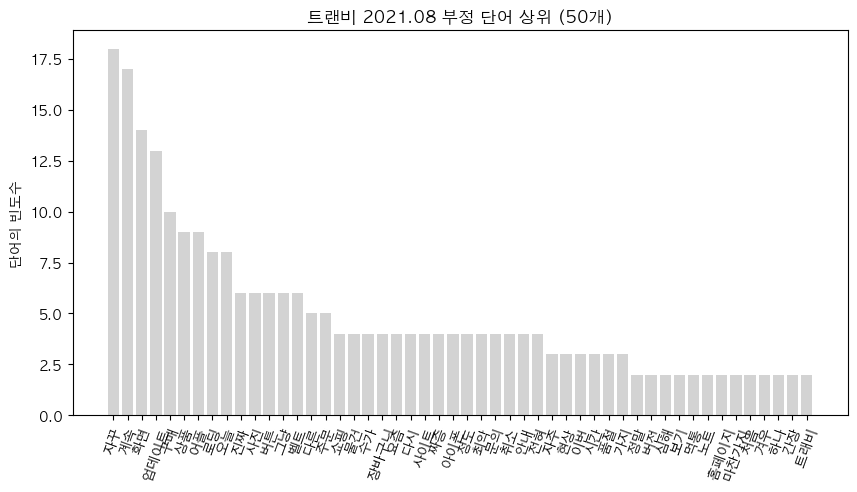

In [13]:
plt.figure(figsize=(10, 5))
plt.title('트랜비 2021.08 부정 단어 상위 (%d개)' % max, fontsize=12
         )    
plt.ylabel('단어의 빈도수')    
plt.xticks(rotation=70)
for key, value in trenbe_2021_08_50.items():

    plt.bar(key, value, color='lightgrey') 
plt.show()

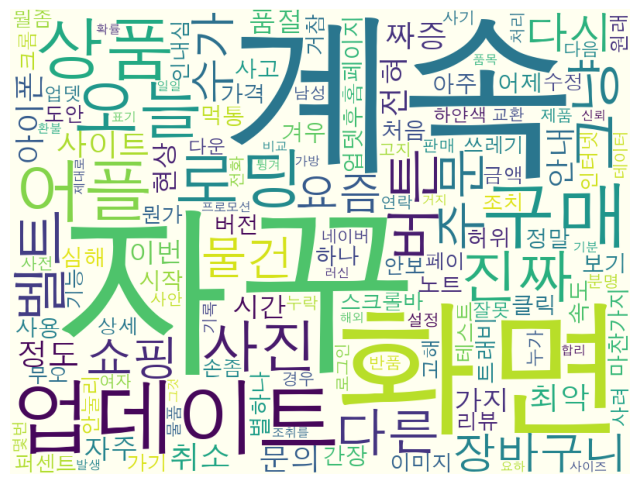

In [16]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(trenbe_2021_08_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [17]:
trenbe_app_202108 = trenbe_2021_08[trenbe_2021_08["category"]=='앱 오류']
trenbe_app_202108

,platform,store,date,review,rating,category,label
6241,trenbe,google,20210831,업데이트하고 나서 정말 느려졌어요 그전 버전이 훨 빠르고 좋아요 ㅠㅠ,2,앱 오류,0
6245,trenbe,google,20210830,아 쇼핑 하는데 너무 답답해요 계속 화면 멈추고,2,앱 오류,0
6246,trenbe,google,20210830,앱이자꾸멈추고안되는데 물건을어째사죠,1,앱 오류,0
6247,trenbe,google,20210830,렉 심해요,2,앱 오류,0
6248,trenbe,google,20210830,렉이 진짜 심하네요 ㅠㅠ,1,앱 오류,0
...,...,...,...,...,...,...,...
12304,trenbe,google,20210826,누가 업데이트 잘못 친 것 같은데,1,앱 오류,0
12315,trenbe,apple,20210824,사고싶은 게 있어서 다운받았는데 하얀색 화면만 뜨고 그 다음으로 넘어가질 않네요 네...,3,앱 오류,0
12316,trenbe,apple,20210824,들어가도 안 떠요,3,앱 오류,0
12365,trenbe,apple,20210818,아이폰인데 분정도기다리면 첫화면뜨네요하,1,앱 오류,0


In [18]:
trenbe_app_202108_nouns = []
for cmt in trenbe_app_202108['review']:
    trenbe_app_202108_nouns.extend(okt.nouns(cmt)) #-- 명사만 추출
#-- 추출된 명사 중에서 길이가 1보다 큰 단어만 추출
trenbe_app_202108_nouns2 = []
word = [w for w in trenbe_app_202108_nouns if len(w) > 1]  
trenbe_app_202108_nouns2.extend(word)

In [19]:
trenbe_app_202108_nouns2

['업데이트',
 '정말',
 '버전',
 '쇼핑',
 '계속',
 '화면',
 '자꾸',
 '물건',
 '심해',
 '진짜',
 '사진',
 '화면',
 '계속',
 '로딩',
 '버튼',
 '오늘',
 '업데이트',
 '상품',
 '보기',
 '먹통',
 '버튼',
 '노트',
 '상품',
 '수가',
 '홈페이지',
 '자주',
 '마찬가지',
 '구매',
 '처음',
 '겨우',
 '사진',
 '하나',
 '간장',
 '트래비',
 '자꾸',
 '화면',
 '현상',
 '계속',
 '계속',
 '사용',
 '진짜',
 '이번',
 '업데이트',
 '속도',
 '클릭',
 '다시',
 '시작',
 '아주',
 '어플',
 '업뎃후',
 '화면',
 '자꾸',
 '이미지',
 '안보',
 '스크롤바',
 '리뷰',
 '퍼센트',
 '조치',
 '계속',
 '뭔가',
 '업데이트',
 '인내심',
 '테스트',
 '거참',
 '쓰레기',
 '진짜',
 '로딩',
 '무오',
 '로딩',
 '시간',
 '상품',
 '금액',
 '자꾸',
 '로딩',
 '손좀',
 '구매',
 '화면',
 '업데이트',
 '가기',
 '어플',
 '사진',
 '아이폰',
 '다른',
 '수정',
 '원래',
 '오늘',
 '기능',
 '계속',
 '업뎃',
 '누가',
 '업데이트',
 '잘못',
 '다운',
 '하얀색',
 '화면',
 '다음',
 '네이버',
 '사이트',
 '기분',
 '아이폰',
 '정도',
 '화면',
 '데이터',
 '장바구니',
 '기록',
 '다시',
 '로그인',
 '설정',
 '경우',
 '사전',
 '고지',
 '업데이트',
 '정말',
 '계속',
 '화면',
 '자꾸',
 '물건',
 '심해',
 '진짜',
 '사진',
 '화면',
 '계속',
 '로딩',
 '버튼',
 '오늘',
 '업데이트',
 '상품',
 '보기',
 '먹통',
 '홈페이지',
 '자주',
 '마찬가지',
 '처음',
 '겨우',
 '사진',
 '하나',
 '간장',

In [20]:
# Counter 객체 생성
trenbe_app_202108_count = Counter(trenbe_app_202108_nouns2)

In [26]:
max = 10
trenbe_app_202108_10 = {}
for word, counts in trenbe_app_202108_count.most_common(max):
    trenbe_app_202108_10[word] = counts
    print(f'{word} : {counts}')

계속 : 15
화면 : 14
업데이트 : 13
자꾸 : 13
로딩 : 8
어플 : 7
진짜 : 6
사진 : 6
오늘 : 5
상품 : 5


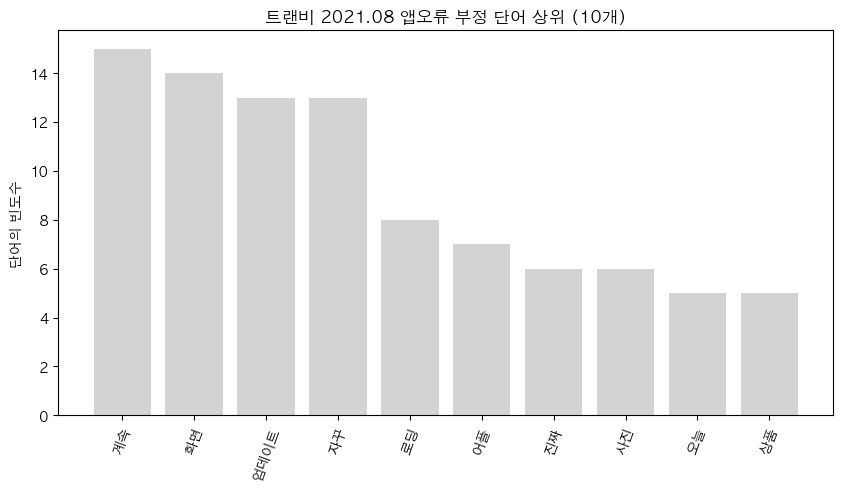

In [27]:
plt.figure(figsize=(10, 5))
plt.title('트랜비 2021.08 앱오류 부정 단어 상위 (%d개)' % max, fontsize=12
         )    
plt.ylabel('단어의 빈도수')    
plt.xticks(rotation=70)
for key, value in trenbe_app_202108_10.items():

    plt.bar(key, value, color='lightgrey') 
plt.show()

In [23]:
font_path =  '/System/Library/Fonts/Supplemental/AppleGothic.ttf'

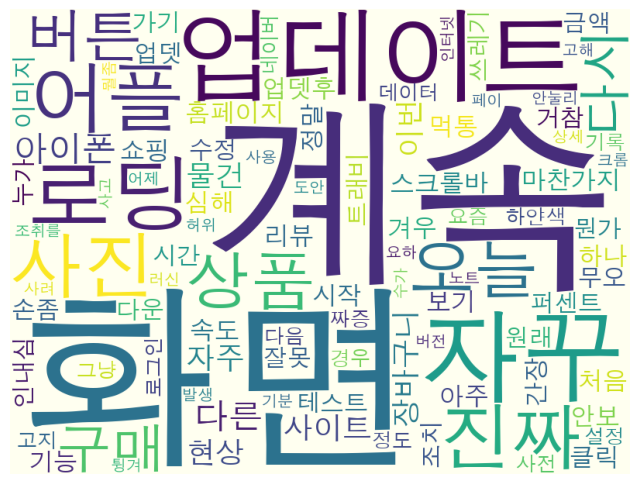

In [24]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(trenbe_app_202108_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

### 확실히 2021.08에는 업데이트 때문에 앱 오류가 발생한 것이 맞아서 부정 리뷰가 많아짐.

### 트렌비 2021.10
- 앱 오류가 지나치가 많음

In [25]:
trenbe_2021_10 = trenbe[trenbe['date'].str.contains('202110')]
trenbe_2021_10

,platform,store,date,review,rating,category,label
5590,trenbe,apple,20211031,흰화면 입니다,1,앱 오류,0
5591,trenbe,apple,20211031,안녕하세요 아이폰x인데 잘사용하다가 몇주전부터 실행이안되네요 삭제했다가 설치하는데도...,1,앱 오류,0
5599,trenbe,google,20211030,쑤뤠기인데..? 결국 70퍼 이상 할인 뭐 이런건 죄다 중고아녀...,1,가격&프로모션,0
5614,trenbe,apple,20211030,상품에 문제가있어서 반품하려니 뭐가이리 까다로워요 반품할려구 챗봇 고객센터 이용할려...,1,고객센터,0
5615,trenbe,apple,20211030,구매내역 확인이 안된다 이정도면 서비스하지 말아야지,1,만족도&기타,0
...,...,...,...,...,...,...,...
12043,trenbe,apple,20211004,그로인해 아직 다른 상품이 있는 거 아니냐 여쭤봤는데 그부분에 대해 답변은 주시지않...,1,고객센터,0
12044,trenbe,apple,20211004,트렌비믿고 구매한적은 있었지만 찜찜한 답변은 신뢰를 약간 떨어뜨리게 만드네요,1,고객센터,0
12052,trenbe,apple,20211001,특정 상품명을 검색하면 무슨 말도 안나오게 검색돼요,1,UX/UI 편의성,0
12053,trenbe,apple,20211001,언제까지 어플이 이렇게 버벅댈건지 모르겠네요 들어가서 좀 보다보면 흰색화면 몇번 보...,1,앱 오류,0


In [29]:
trenbe_2021_10['review'] = trenbe_2021_10['review'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))

/var/folders/58/gn_xg82n3_d5871yqsk64tm40000gn/T/ipykernel_5080/3234711767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trenbe_2021_10['review'] = trenbe_2021_10['review'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))


In [30]:
trenbe_2021_10_nouns = []
for cmt in trenbe_2021_10['review']:
    trenbe_2021_10_nouns.extend(okt.nouns(cmt)) #-- 명사만 추출
#-- 추출된 명사 중에서 길이가 1보다 큰 단어만 추출
trenbe_2021_10_nouns2 = []
word = [w for w in trenbe_2021_10_nouns if len(w) > 1]  
trenbe_2021_10_nouns2.extend(word)

In [31]:
trenbe_2021_10_nouns2

['화면',
 '아이폰',
 '주전',
 '실행',
 '삭제',
 '설치',
 '언제',
 '쑤뤠기',
 '이상',
 '할인',
 '중고',
 '상품',
 '문제',
 '반품',
 '반품',
 '챗봇',
 '고객',
 '센터',
 '이용',
 '반품',
 '기능',
 '문제',
 '상품',
 '반품',
 '사용',
 '안함',
 '완전',
 '은기',
 '확인',
 '정도',
 '서비스',
 '자주',
 '가짐',
 '안정화',
 '회원',
 '가입',
 '쿠폰',
 '다운',
 '이유',
 '어플',
 '기본',
 '기능',
 '대체',
 '다운',
 '삭제',
 '트렌비',
 '물건',
 '물건',
 '반품',
 '이상',
 '택배',
 '응대',
 '명품',
 '개도',
 '절대',
 '무슨',
 '직구도',
 '여기',
 '이용',
 '다운',
 '삭제',
 '다시',
 '다운',
 '어플',
 '골프',
 '카테고리',
 '스크롤',
 '갑자기',
 '화면',
 '몇번',
 '반복',
 '어플',
 '자꾸',
 '시작',
 '메인',
 '화면',
 '다시',
 '계속',
 '상반',
 '고해',
 '계속',
 '메인',
 '화면',
 '페이지',
 '상품',
 '혼자',
 '계속',
 '메인',
 '지금',
 '어플',
 '다른',
 '페이지',
 '구경',
 '정도',
 '메인',
 '화면',
 '계속',
 '확인',
 '접속',
 '로딩',
 '와이파이',
 '데이터',
 '시도',
 '로딩',
 '삭제',
 '설치',
 '멋대로',
 '처음',
 '화면',
 '검색',
 '상품',
 '검색',
 '구경',
 '갑자기',
 '처음',
 '화면',
 '버튼',
 '잘못',
 '다시',
 '검색',
 '한지',
 '초도',
 '멋대로',
 '처음',
 '화면',
 '구경',
 '만듬',
 '삭제',
 '보고',
 '리세',
 '일도',
 '하루',
 '몇번',
 '진짜',
 '한번',
 '그냥',
 '화면',
 '다시',
 '그때',
 '개선',
 '

In [32]:
# Counter 객체 생성
trenbe_2021_10_count = Counter(trenbe_2021_10_nouns2)

In [33]:
max = 50
trenbe_2021_10_50 = {}
for word, counts in trenbe_2021_10_count.most_common(max):
    trenbe_2021_10_50[word] = counts
    print(f'{word} : {counts}')

업데이트 : 71
계속 : 36
화면 : 30
어플 : 24
상품 : 23
하라 : 17
반품 : 16
접속 : 15
삭제 : 14
그냥 : 13
검색 : 12
취소 : 11
고객 : 10
다운 : 10
개선 : 10
정도 : 9
자꾸 : 9
실행 : 8
가짐 : 8
다시 : 8
메인 : 8
해도 : 8
답변 : 8
확인 : 7
쿠폰 : 7
몇번 : 7
구경 : 7
사이즈 : 7
설치 : 6
언제 : 6
센터 : 6
사용 : 6
물건 : 6
처음 : 6
버튼 : 6
연락 : 6
문의 : 6
사이트 : 6
최악 : 6
할인 : 5
갑자기 : 5
로딩 : 5
보고 : 5
안내 : 5
제품 : 5
이상 : 4
문제 : 4
이용 : 4
기능 : 4
서비스 : 4


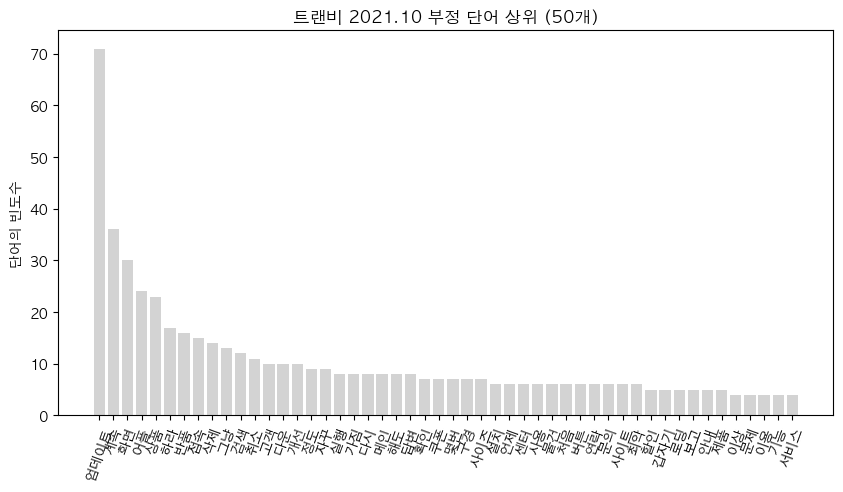

In [34]:
plt.figure(figsize=(10, 5))
plt.title('트랜비 2021.10 부정 단어 상위 (%d개)' % max, fontsize=12
         )    
plt.ylabel('단어의 빈도수')    
plt.xticks(rotation=70)
for key, value in trenbe_2021_10_50.items():

    plt.bar(key, value, color='lightgrey') 
plt.show()

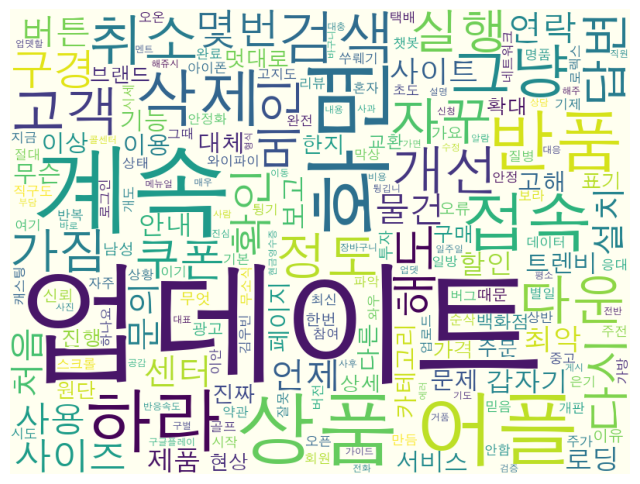

In [35]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(trenbe_2021_10_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [36]:
trenbe_app_202110 = trenbe_2021_10[trenbe_2021_10["category"]=='앱 오류']
trenbe_app_202110

,platform,store,date,review,rating,category,label
5590,trenbe,apple,20211031,흰화면 입니다,1,앱 오류,0
5591,trenbe,apple,20211031,안녕하세요 아이폰 인데 잘사용하다가 몇주전부터 실행이안되네요 삭제했다가 설치하는데도...,1,앱 오류,0
5650,trenbe,google,20211027,앱이 자주 안 들어가짐 내가 앱 안정화하는게 더 빠를 듯,1,앱 오류,0
5651,trenbe,apple,20211027,회원가입도 쿠폰다운도 다 안됨,1,앱 오류,0
5652,trenbe,apple,20211027,이걸 쓰는 이유를 다 막아버림 걍 다 안됨,1,앱 오류,0
...,...,...,...,...,...,...,...
11874,trenbe,google,20211014,들어와보니 업데이트하라고 해서 업뎃하려니 안되고 튕깁니다,1,앱 오류,0
12033,trenbe,google,20211005,앱이 계속 다운되고 불편하네요,2,앱 오류,0
12034,trenbe,google,20211004,징바구니 넣어놨는데 장바구니 찜하기 버튼 누르면 자꾸 홈화면으로 이동돼요 앱으로 결...,1,앱 오류,0
12035,trenbe,google,20211004,화면이 계속 깜빡거리고 홈으로 자동 돌아가는 현상이 있어 탐색 조차 불가능하네요,1,앱 오류,0


In [37]:
trenbe_app_202110_nouns = []
for cmt in trenbe_app_202110['review']:
    trenbe_app_202110_nouns.extend(okt.nouns(cmt)) #-- 명사만 추출
#-- 추출된 명사 중에서 길이가 1보다 큰 단어만 추출
trenbe_app_202110_nouns2 = []
word = [w for w in trenbe_app_202110_nouns if len(w) > 1]  
trenbe_app_202110_nouns2.extend(word)

In [38]:
trenbe_app_202110_nouns2

['화면',
 '아이폰',
 '주전',
 '실행',
 '삭제',
 '설치',
 '언제',
 '자주',
 '가짐',
 '안정화',
 '회원',
 '가입',
 '쿠폰',
 '다운',
 '이유',
 '어플',
 '기본',
 '기능',
 '대체',
 '다운',
 '삭제',
 '다운',
 '삭제',
 '다시',
 '다운',
 '어플',
 '골프',
 '카테고리',
 '스크롤',
 '갑자기',
 '화면',
 '몇번',
 '반복',
 '어플',
 '자꾸',
 '시작',
 '메인',
 '화면',
 '다시',
 '계속',
 '상반',
 '고해',
 '계속',
 '메인',
 '화면',
 '지금',
 '어플',
 '다른',
 '페이지',
 '구경',
 '정도',
 '메인',
 '화면',
 '계속',
 '확인',
 '접속',
 '로딩',
 '와이파이',
 '데이터',
 '시도',
 '로딩',
 '삭제',
 '설치',
 '멋대로',
 '처음',
 '화면',
 '검색',
 '상품',
 '검색',
 '구경',
 '갑자기',
 '처음',
 '화면',
 '버튼',
 '잘못',
 '다시',
 '검색',
 '한지',
 '초도',
 '멋대로',
 '처음',
 '화면',
 '구경',
 '만듬',
 '삭제',
 '보고',
 '리세',
 '일도',
 '하루',
 '몇번',
 '진짜',
 '한번',
 '그냥',
 '화면',
 '다시',
 '그때',
 '개선',
 '버그',
 '카테고리',
 '브랜드',
 '화면',
 '계속',
 '보라',
 '그냥',
 '사용',
 '삭제',
 '리뷰',
 '가방',
 '구매',
 '기제',
 '완료',
 '취소',
 '상태',
 '이기',
 '주가',
 '주문',
 '취소',
 '연락',
 '고지도',
 '일방',
 '취소',
 '쿠폰',
 '막상',
 '무엇',
 '안정',
 '개판',
 '상품',
 '보고',
 '계속',
 '화면',
 '튕기',
 '현상',
 '로그인',
 '김우빈',
 '캐스팅',
 '정도',
 '개선',
 '그냥',
 '화면',
 '어플',


In [39]:
# Counter 객체 생성
trenbe_app_202110_count = Counter(trenbe_app_202110_nouns2)

In [40]:
max = 10
trenbe_app_202110_10 = {}
for word, counts in trenbe_app_202110_count.most_common(max):
    trenbe_app_202110_10[word] = counts
    print(f'{word} : {counts}')

업데이트 : 71
계속 : 34
화면 : 30
어플 : 18
하라 : 17
접속 : 15
삭제 : 12
다운 : 10
실행 : 8
가짐 : 8


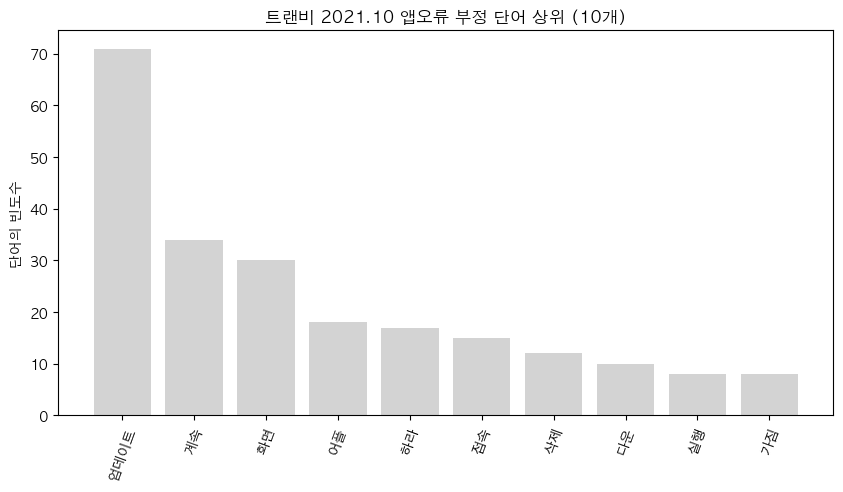

In [41]:
plt.figure(figsize=(10, 5))
plt.title('트랜비 2021.10 앱오류 부정 단어 상위 (%d개)' % max, fontsize=12
         )    
plt.ylabel('단어의 빈도수')    
plt.xticks(rotation=70)
for key, value in trenbe_app_202110_10.items():

    plt.bar(key, value, color='lightgrey') 
plt.show()

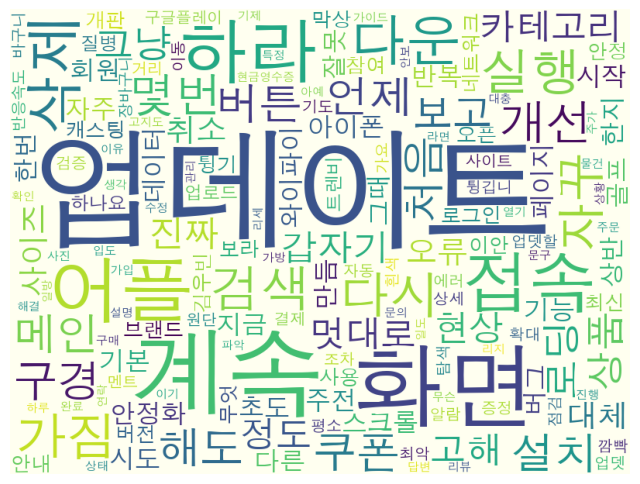

In [42]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(trenbe_app_202110_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

###  2021.10에도 업데이트 때문에 앱 오류가 발생한 것이 맞아서 부정 리뷰가 많아짐

### 트렌비 2021.08_2021.11 만족도&기타, 고객센터 > 어떤 부분이 불만족스러웠는지 확인

In [65]:
trenbe_2021_08 = trenbe[trenbe['date'].str.contains('202108')]

In [66]:
trenbe_2021_09 = trenbe[trenbe['date'].str.contains('202109')]

In [67]:
trenbe_2021_10 = trenbe[trenbe['date'].str.contains('202110')]

In [68]:
trenbe_2021_11 = trenbe[trenbe['date'].str.contains('202111')]

In [71]:
trenbe_2021_08_11 = pd.concat([trenbe_2021_08,trenbe_2021_09,trenbe_2021_10,trenbe_2021_11])

In [72]:
trenbe_2021_08_11

,platform,store,date,review,rating,category,label
6241,trenbe,google,20210831,업데이트하고 나서 정말 느려졌어요. 그전 버전이 훨 빠르고 좋아요.ㅠㅠ,2,앱 오류,0
6245,trenbe,google,20210830,아 쇼핑 하는데 너무 답답해요 계속 화면 멈추고,2,앱 오류,0
6246,trenbe,google,20210830,앱이자꾸멈추고안되는데 물건을어째사죠?,1,앱 오류,0
6247,trenbe,google,20210830,렉 심해요,2,앱 오류,0
6248,trenbe,google,20210830,렉이 진짜 심하네요 ㅠㅠ,1,앱 오류,0
...,...,...,...,...,...,...,...
11141,trenbe,google,20211103,물건 우겨넣고 취소수수료로 장사하는 쓰레기기업입니다,1,가격&프로모션,0
11210,trenbe,apple,20211102,현지바잉중 주째 떠서 그냥 취소했어요,2,상품 구색,0
11211,trenbe,apple,20211102,현지바잉이 너무 오래 지속되면 구매자랑 연락이 되면 좋겠어요,2,고객센터,0
11212,trenbe,apple,20211102,취소할지말지 버튼도 없고ㅠㅠ,2,UX/UI 편의성,0


In [73]:
trenbe_2021_08_11_cus = trenbe_2021_08_11[trenbe_2021_08_11["category"]=='고객센터']

In [74]:
trenbe_2021_08_11_sat = trenbe_2021_08_11[trenbe_2021_08_11["category"]=='만족도&기타']

In [75]:
trenbe_2021_08_11_sur = pd.concat([trenbe_2021_08_11_cus,trenbe_2021_08_11_sat])

In [76]:
trenbe_2021_08_11_sur

,platform,store,date,review,rating,category,label
6372,trenbe,google,20210813,최악최악... 제품이 너무 안 와서 문의했는데 판매처 누락으로 취소해야 한다고 합니...,1,고객센터,0
6413,trenbe,apple,20210807,안내도 없이 품절됐다며 주문한 상품 5가지를 한꺼번에 그냥 취소해버리네요 5개나 품...,1,고객센터,0
6451,trenbe,apple,20210802,벨트를 주문했는데 분명 남성->악세서리-> 벨트 이렇게 되있는데 오늘 벨트를 받고 ...,1,고객센터,0
12619,trenbe,apple,20210802,전화를 몇번이나 드려도 안받으시네요,1,고객센터,0
6127,trenbe,apple,20210930,"개인정보유출, 배송지연, 허위광고, CS대응 등 모든 것이 다 최악",1,고객센터,0
...,...,...,...,...,...,...,...
11060,trenbe,google,20211105,이거 마이너스는 없는건가요,1,만족도&기타,0
11129,trenbe,google,20211103,정말 이상한 곳이예요,1,만족도&기타,0
11132,trenbe,google,20211103,그러면서 교환 반품은 안된다네요 참나 책임지지 않으려는 꼼수도 여러가지네요 조카랑 ...,1,만족도&기타,0
11137,trenbe,google,20211103,진짜 최악입니다,1,만족도&기타,0


In [77]:
trenbe_2021_08_11_sur['review'] = trenbe_2021_08_11_sur['review'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))

In [78]:
trenbe_2021_08_11_sur_nouns = []
for cmt in trenbe_2021_08_11_sur['review']:
    trenbe_2021_08_11_sur_nouns.extend(okt.nouns(cmt)) #-- 명사만 추출
#-- 추출된 명사 중에서 길이가 1보다 큰 단어만 추출
trenbe_2021_08_11_sur_nouns2 = []
word = [w for w in trenbe_2021_08_11_sur_nouns if len(w) > 1]  
trenbe_2021_08_11_sur_nouns2.extend(word)

In [79]:
trenbe_2021_08_11_sur_nouns2

['최악',
 '최악',
 '제품',
 '문의',
 '판매',
 '누락',
 '취소',
 '정도',
 '사안',
 '문의',
 '연락',
 '처리',
 '안내',
 '품절',
 '주문',
 '상품',
 '가지',
 '그냥',
 '취소',
 '품절',
 '주문',
 '그것',
 '구매',
 '가지',
 '상품',
 '거지',
 '확률',
 '구매',
 '품목',
 '환불',
 '안내',
 '전혀',
 '전혀',
 '사기',
 '벨트',
 '주문',
 '분명',
 '남성',
 '벨트',
 '오늘',
 '벨트',
 '여자',
 '사이즈',
 '제대로',
 '표기',
 '반품',
 '교환',
 '물품',
 '전화',
 '몇번',
 '전화',
 '몇번',
 '개인정보',
 '유출',
 '배송',
 '지연',
 '허위',
 '광고',
 '대응',
 '모든',
 '최악',
 '배송',
 '지연',
 '연락',
 '직접',
 '문의',
 '문제',
 '제기',
 '신뢰',
 '어플',
 '개인정보',
 '유출',
 '메일',
 '사람',
 '백화점',
 '이유',
 '하자',
 '상품',
 '사진',
 '상품',
 '제외',
 '재고',
 '관계',
 '환불',
 '처리',
 '통보',
 '광고',
 '화가',
 '소비자보호원',
 '신고',
 '고객',
 '권리',
 '해도',
 '그때',
 '계속',
 '전화',
 '제발',
 '제발',
 '제발',
 '이용',
 '도안',
 '직접',
 '최악',
 '진품',
 '인지도',
 '의문',
 '에루샤',
 '얼마',
 '후속',
 '대응',
 '별로',
 '얼마',
 '상품',
 '하자',
 '요청',
 '담당자',
 '연결',
 '연결',
 '답변',
 '가능',
 '여부',
 '대한',
 '답변',
 '일단',
 '주가',
 '에루샤',
 '마침내',
 '대행',
 '본사',
 '수리',
 '트렌비',
 '수선',
 '업체',
 '여기',
 '의문',
 '담당자',
 '공개',
 '후기',
 '곳도',
 '의문',
 '

In [80]:
# Counter 객체 생성
trenbe_2021_08_11_sur_count = Counter(trenbe_2021_08_11_sur_nouns2)

In [83]:
max = 50
trenbe_2021_08_11_sur_50 = {}
for word, counts in trenbe_2021_08_11_sur_count.most_common(max):
    trenbe_2021_08_50[word] = counts
    print(f'{word} : {counts}')

상품 : 27
취소 : 26
반품 : 17
연락 : 15
최악 : 14
그냥 : 13
광고 : 13
답변 : 13
문의 : 12
고객 : 12
삭제 : 12
주문 : 11
전화 : 10
판매 : 9
구매 : 9
대응 : 9
어플 : 9
품절 : 8
오늘 : 8
이용 : 8
서비스 : 8
처리 : 7
안내 : 7
자꾸 : 7
제품 : 6
환불 : 6
벨트 : 6
교환 : 6
재고 : 6
계속 : 6
제발 : 6
담당자 : 6
진짜 : 6
다른 : 6
센터 : 6
사용 : 6
확인 : 6
가요 : 6
리뷰 : 6
정도 : 5
남성 : 5
개인정보 : 5
신뢰 : 5
여기 : 5
내용 : 5
바로 : 5
상담 : 5
대해 : 5
트랜비 : 5
물건 : 5


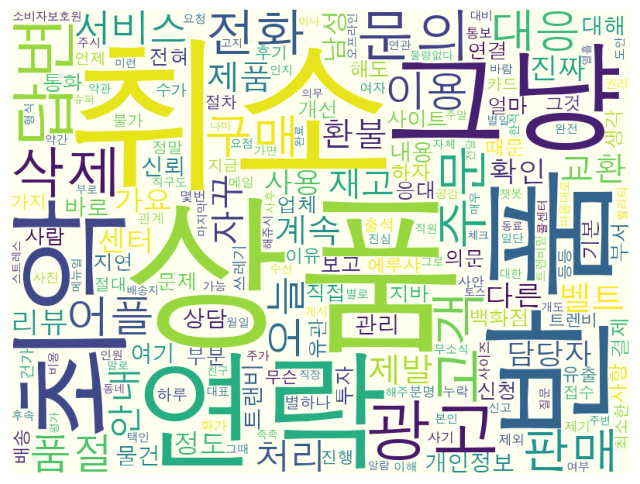

In [86]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(trenbe_2021_08_11_sur_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

### 키워드를 보면 연락 없이 품절 상품을 그냥 취소, 반품처리 때려버리는 거 같음.. 고객센터 대응, 답변도 최악?..

### 트렌비 2021.12_2022.01 고객센터, 가격프로모션

In [68]:
trenbe_2021_09 = trenbe[trenbe['date'].str.contains('202109')]

In [70]:
trenbe_2021_11 = trenbe[trenbe['date'].str.contains('202111')]

In [71]:
trenbe_2021_12 = trenbe[trenbe['date'].str.contains('202112')]

In [72]:
trenbe_2022_01 = trenbe[trenbe['date'].str.contains('202201')]

In [88]:
trenbe_withoutapp = pd.concat([trenbe_2021_12, trenbe_2022_01,trenbe_2021_09,trenbe_2021_11 ])

In [89]:
trenbe_withoutapp

,platform,store,date,review,rating,category,label
4329,trenbe,google,20211216,고객사이트 연락이 너무 힘들다,3,고객센터,0
4364,trenbe,google,20211216,별한개도 아까움 재고도없으면서 있다고 떠있고,1,상품 구색,0
4365,trenbe,google,20211216,고객선터 연결은 기본20분이상,1,고객센터,0
4366,trenbe,google,20211216,주말포함10일기다림 5일배송인데,1,배송,0
4374,trenbe,google,20211216,"취소, 수정, 환불, 반품 버튼이 없어서 너무 불편해요",1,UX/UI 편의성,0
...,...,...,...,...,...,...,...
11141,trenbe,google,20211103,물건 우겨넣고 취소수수료로 장사하는 쓰레기기업입니다,1,가격&프로모션,0
11210,trenbe,apple,20211102,현지바잉중 주째 떠서 그냥 취소했어요,2,상품 구색,0
11211,trenbe,apple,20211102,현지바잉이 너무 오래 지속되면 구매자랑 연락이 되면 좋겠어요,2,고객센터,0
11212,trenbe,apple,20211102,취소할지말지 버튼도 없고ㅠㅠ,2,UX/UI 편의성,0


In [90]:
trenbe_2108_2201_cus = trenbe_withoutapp[trenbe_withoutapp["category"]=='고객센터']

In [91]:
trenbe_2108_2201_sat = trenbe_withoutapp[trenbe_withoutapp["category"]=='만족도&기타']

In [92]:
trenbe_withoutapp = pd.concat([trenbe_2108_2201_cus,trenbe_2108_2201_sat])

In [93]:
trenbe_withoutapp

,platform,store,date,review,rating,category,label
4329,trenbe,google,20211216,고객사이트 연락이 너무 힘들다,3,고객센터,0
4365,trenbe,google,20211216,고객선터 연결은 기본20분이상,1,고객센터,0
4375,trenbe,google,20211216,고객센터는 사람이 부족한건지 상담원분과 연결되기까지 시간을 너무 잡아먹습니다,1,고객센터,0
4378,trenbe,google,20211216,이거때문에 또 시간들여서 전화하기 너무 힘들 것 같네요,1,고객센터,0
4379,trenbe,google,20211216,서비스가 너무 별로입니다,1,고객센터,0
...,...,...,...,...,...,...,...
11060,trenbe,google,20211105,이거 마이너스는 없는건가요,1,만족도&기타,0
11129,trenbe,google,20211103,정말 이상한 곳이예요,1,만족도&기타,0
11132,trenbe,google,20211103,그러면서 교환 반품은 안된다네요 참나 책임지지 않으려는 꼼수도 여러가지네요 조카랑 ...,1,만족도&기타,0
11137,trenbe,google,20211103,진짜 최악입니다,1,만족도&기타,0


In [94]:
trenbe_withoutapp['review'] = trenbe_withoutapp['review'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))

In [95]:
trenbe_withoutapp_nouns = []
for cmt in trenbe_withoutapp['review']:
    trenbe_withoutapp_nouns.extend(okt.nouns(cmt)) #-- 명사만 추출
#-- 추출된 명사 중에서 길이가 1보다 큰 단어만 추출
trenbe_withoutapp_nouns2 = []
word = [w for w in trenbe_withoutapp_nouns if len(w) > 1]  
trenbe_withoutapp_nouns2.extend(word)

In [96]:
trenbe_withoutapp_nouns2

['고객',
 '사이트',
 '연락',
 '객선',
 '연결',
 '기본',
 '이상',
 '고객',
 '센터',
 '사람',
 '상담',
 '분과',
 '연결',
 '시간',
 '때문',
 '시간',
 '서비스',
 '별로',
 '주문',
 '입금',
 '반나절',
 '입금',
 '확인',
 '환불',
 '입금',
 '확인',
 '상담',
 '보지',
 '고객',
 '센터',
 '관련',
 '문의',
 '전화',
 '시간',
 '연결',
 '대기',
 '채팅',
 '시간',
 '대답',
 '한마디',
 '다시',
 '하루',
 '종일',
 '답변',
 '리퍼',
 '여기저기',
 '상처',
 '손가락',
 '지문',
 '자국',
 '덕지덕지',
 '최악',
 '밸트',
 '연락처',
 '주지',
 '네이버',
 '문의',
 '구매',
 '대행',
 '고객',
 '센터',
 '전화',
 '겨우',
 '겨우',
 '채팅',
 '반품',
 '신청',
 '반품',
 '택배',
 '반품',
 '연락',
 '하루',
 '온종일',
 '자동',
 '고객',
 '센터',
 '처리',
 '전화',
 '서비스',
 '엉망',
 '강제',
 '환불',
 '전화',
 '상황',
 '설명',
 '사과',
 '메시지',
 '하나',
 '그게',
 '상품',
 '리뷰',
 '질문',
 '채팅',
 '고객',
 '센터',
 '로만',
 '환불',
 '대서',
 '고객',
 '센터',
 '전화',
 '하루',
 '종일',
 '연결',
 '지금',
 '순간',
 '트렌',
 '고객',
 '센터',
 '전화',
 '환불',
 '절차',
 '운영',
 '구매',
 '신발',
 '환불',
 '고객',
 '센터',
 '제발',
 '전화',
 '애플',
 '트랜비',
 '다운',
 '전체',
 '화면',
 '애플',
 '고객',
 '연락',
 '이건',
 '개발자',
 '문의',
 '하라',
 '다시',
 '전체',
 '화면',
 '업데이트',
 '주심',
 '깝깝해',
 '무쟈',
 '자주',
 

In [97]:
# Counter 객체 생성
trenbe_withoutapp_count = Counter(trenbe_withoutapp_nouns2)

In [99]:
max = 10
trenbe_withoutapp_10 = {}
for word, counts in trenbe_withoutapp_count.most_common(max):
    trenbe_withoutapp_10[word] = counts
    print(f'{word} : {counts}')

고객 : 54
센터 : 43
전화 : 38
연결 : 33
취소 : 29
환불 : 25
문의 : 25
연락 : 23
상담 : 23
상품 : 23


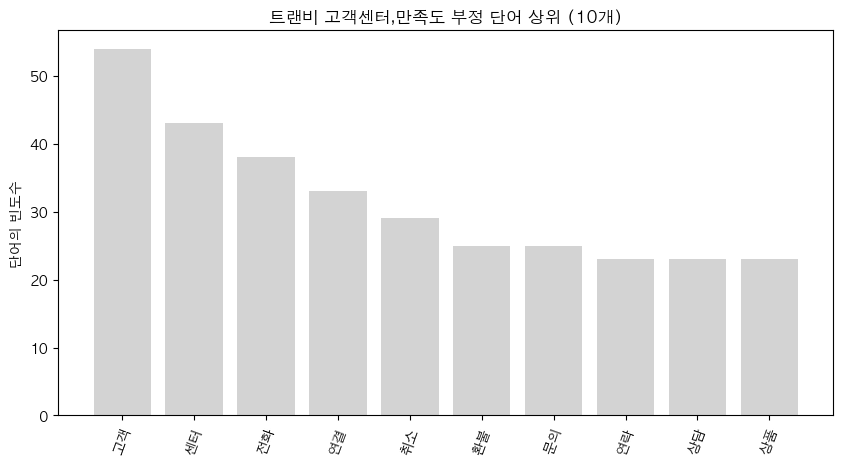

In [100]:
plt.figure(figsize=(10, 5))
plt.title('트랜비 고객센터,만족도 부정 단어 상위 (%d개)' % max, fontsize=12
         )    
plt.ylabel('단어의 빈도수')    
plt.xticks(rotation=70)
for key, value in trenbe_withoutapp_10.items():

    plt.bar(key, value, color='lightgrey') 
plt.show()

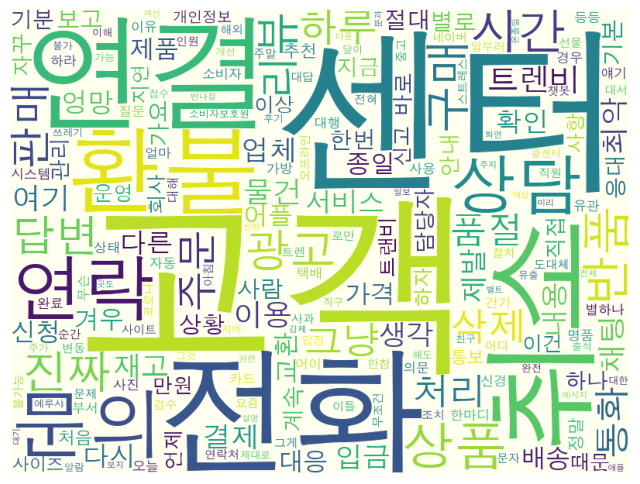

In [101]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(trenbe_withoutapp_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# 발란
- 2021_2022년에 리뷰가 별로 없음에도 불구하고 부정 리뷰가 2023보다 많음.
- 2023년에는 긍정 리뷰는 엄청 늘고, 전체 리뷰가 적었던 2021_2022보다 부정 리뷰 개수가 적음 
- 발란이 어떤 행보를 했길래 2023이 되면서 부정 리뷰가 줄어들었는지 확인 필요 (워드클라우드)
- 2023 긍정 리뷰도 살짝 참고하면서 행보 구체화 (워드클라우드)> 보류
    - 워드클라우드 2021_2022 만족도 앱오류 고객센터 

In [102]:
# 발란
balaan = data_ne[data_ne["platform"]=='balaan']
balaan

,platform,store,date,review,rating,category,label
3,balaan,google,20230914,포장이 안돼서 오는게 좀 그렇지만,5,상품 품질,0
30,balaan,google,20230912,배송이 좀 늦어져서 짜증낫었는데,5,배송,0
62,balaan,google,20230911,쿠폰 너무많뜸 쇼핑 불가할정도로 귀찮게함,1,가격&프로모션,0
65,balaan,google,20230911,품절뜨면 가슴 찢어집니다,5,상품 구색,0
113,balaan,google,20230904,결재취소 안됨 일부러 오류나게 해놨는지 계속 오류뜸 쓰레기,1,앱 오류,0
...,...,...,...,...,...,...,...
12764,balaan,google,20210618,주말에도 당일배송 됐으면 좋겠어요,5,배송,0
12784,balaan,google,20210615,조금만 더 빨라지면 좋겠어요,5,만족도&기타,0
12794,balaan,google,20210531,최악입니다,1,만족도&기타,0
12811,balaan,google,20210426,최악이네요,1,만족도&기타,0


In [103]:
balaan['date']=balaan['date'].astype(str)

/var/folders/58/gn_xg82n3_d5871yqsk64tm40000gn/T/ipykernel_5080/2424093257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balaan['date']=balaan['date'].astype(str)


In [104]:
balaan_21 = balaan[balaan['date'].str.contains('2021')]

In [105]:
balaan_22 = balaan[balaan['date'].str.contains('2022')]

In [106]:
balaan_21_22 = pd.concat([balaan_22, balaan_21])

In [108]:
balaan_21_22

,platform,store,date,review,rating,category,label
2582,balaan,google,20221223,오늘 출발이라면서 일째 출발 안 함ㅋㅋ,1,배송,0
2592,balaan,google,20221221,알람 수신도안하는데 왜이렇게들 보내는겨 설정 찾기도 겁나어렵게해놓고,1,UX/UI 편의성,0
2603,balaan,google,20221218,진짜 앱 개못만들었네 정신병걸리겠네,1,UX/UI 편의성,0
2604,balaan,google,20221217,별 도 아까움 명품케이스도 없는제품팔고 리뷰사진과 완전다르게와서 가품같다고,1,정품 안전성,0
2605,balaan,google,20221217,협력업체 편만 들어서 환불요청했더니 반품비내라는 어이없는 발란업체입니다,1,배송,0
...,...,...,...,...,...,...,...
12764,balaan,google,20210618,주말에도 당일배송 됐으면 좋겠어요,5,배송,0
12784,balaan,google,20210615,조금만 더 빨라지면 좋겠어요,5,만족도&기타,0
12794,balaan,google,20210531,최악입니다,1,만족도&기타,0
12811,balaan,google,20210426,최악이네요,1,만족도&기타,0


In [107]:
balaan_21_22_app = balaan_21_22[balaan_21_22["category"]=='앱 오류']

In [108]:
balaan_21_22_sat = balaan_21_22[balaan_21_22["category"]=='만족도&기타']

In [109]:
balaan_21_22_sur = pd.concat([balaan_21_22_app, balaan_21_22_sat])

In [127]:
balaan_21_22_dil = balaan_21_22[balaan_21_22["category"]=='배송']

In [128]:
balaan_21_22_ux = balaan_21_22[balaan_21_22["category"]=='UX/UI 편의성']

In [129]:
balaan_21_22_ux_dil = pd.concat([balaan_21_22_dil, balaan_21_22_ux])

In [130]:
balaan_21_22_ux_dil

,platform,store,date,review,rating,category,label
2582,balaan,google,20221223,오늘 출발이라면서 일째 출발 안 함ㅋㅋ,1,배송,0
2605,balaan,google,20221217,협력업체 편만 들어서 환불요청했더니 반품비내라는 어이없는 발란업체입니다,1,배송,0
2608,balaan,google,20221216,반품하면 반품택배비로 수익창출 참 그지같다,1,배송,0
2945,balaan,google,20221014,반품이나 사이즈교환시 비용이 만만치 않네요,1,배송,0
2980,balaan,google,20221005,오늘출발 주문했으나 이틀뒤 배송준비만 뜨더니 품절이라고 취소문자옴이용할일 도 없을거...,1,배송,0
...,...,...,...,...,...,...,...
11376,balaan,google,20211027,앱 안정성 매우떨어짐 중학생이 어플 만든듯한 퀄리티 이딴 쓰레기 앱 만들고 장사 쉽...,1,UX/UI 편의성,0
11764,balaan,google,20211015,제품 파는 사이트에서 확대가 안된다니뭘 자세히 볼수가 없고깨알같은 글씨 읽기 싫어서...,2,UX/UI 편의성,0
12517,balaan,google,20210807,추가로 리뷰는 그 제품의 리뷰만 나오게 하시면 좋을 듯 싶네요,3,UX/UI 편의성,0
12518,balaan,google,20210807,난잡해보이네요,3,UX/UI 편의성,0


In [110]:
balaan_21_22_sur

,platform,store,date,review,rating,category,label
2623,balaan,google,20221215,인터넷 결재하려는데 배송지 입럭다 되었는데 배송지 입력하라는 오류 계속 발생 상품도...,1,앱 오류,0
2624,balaan,google,20221215,몇십만원어치 골라놨는데 결재가 안되어서 다른데에서 구매했습니다,1,앱 오류,0
2921,balaan,google,20221022,도대체 로그인을 어떻게 하는건가요 로그인 페이지가 안나와요,1,앱 오류,0
3077,balaan,google,20220922,뒤로 가기 누르면 처음으로 돌아가는건 리뷰보니 작년부터있는 문제인데 고치지를 못하시...,1,앱 오류,0
3110,balaan,google,20220919,로그인이 안됩니다,1,앱 오류,0
...,...,...,...,...,...,...,...
12709,balaan,google,20210624,결제 수단이 좀 더 늘었으면 합니다,5,만족도&기타,0
12784,balaan,google,20210615,조금만 더 빨라지면 좋겠어요,5,만족도&기타,0
12794,balaan,google,20210531,최악입니다,1,만족도&기타,0
12811,balaan,google,20210426,최악이네요,1,만족도&기타,0


In [131]:
balaan_21_22_ux_dil['review'] = balaan_21_22_ux_dil['review'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))

In [132]:
balaan_21_22_ux_dil_nouns = []
for cmt in balaan_21_22_ux_dil['review']:
    balaan_21_22_ux_dil_nouns.extend(okt.nouns(cmt)) #-- 명사만 추출
#-- 추출된 명사 중에서 길이가 1보다 큰 단어만 추출
balaan_21_22_ux_dil_nouns2 = []
word = [w for w in balaan_21_22_ux_dil_nouns if len(w) > 1]  
balaan_21_22_ux_dil_nouns2.extend(word)

In [133]:
balaan_21_22_ux_dil_nouns2

['오늘',
 '출발',
 '면서',
 '출발',
 '협력',
 '업체',
 '환불',
 '요청',
 '반품',
 '발란',
 '업체',
 '반품',
 '반품',
 '택배',
 '수익',
 '반품',
 '사이즈',
 '교환',
 '비용',
 '오늘',
 '출발',
 '주문',
 '이틀',
 '배송',
 '준비',
 '품절',
 '취소',
 '문자',
 '해외',
 '배송',
 '달이',
 '요음',
 '반품',
 '반품',
 '배송비',
 '만천원',
 '정신',
 '회사',
 '판매',
 '배송비',
 '동봉',
 '택배',
 '천원',
 '개굿',
 '최악',
 '생일',
 '선물',
 '주일',
 '달리',
 '홈페이지',
 '도착',
 '기간',
 '기입',
 '이해',
 '해외',
 '출발',
 '고함',
 '심지어',
 '신발',
 '전날',
 '발송',
 '당일',
 '발송',
 '하루',
 '쟁일',
 '물건',
 '배송',
 '예정',
 '며칠',
 '도착',
 '하루',
 '이틀',
 '도아',
 '고객',
 '생각',
 '취소',
 '해주시',
 '전부',
 '해외',
 '배송',
 '추적',
 '반품',
 '처리',
 '최악',
 '반품',
 '물건',
 '주일',
 '반품',
 '수령',
 '전이',
 '표시',
 '반품',
 '진행',
 '해외',
 '배송',
 '호주',
 '분실',
 '취소',
 '고함',
 '판매',
 '시스템',
 '쇼핑몰',
 '구매',
 '분뒤',
 '취소',
 '배송',
 '채팅',
 '물건',
 '국내',
 '대요',
 '상품',
 '당일',
 '배송',
 '목욜',
 '담날',
 '저녁',
 '금요일',
 '배송',
 '준비',
 '중도',
 '배송',
 '배송',
 '배송',
 '예정',
 '배송',
 '다음',
 '약속',
 '때문',
 '환불',
 '환불',
 '그냥',
 '광고',
 '박아',
 '잠깐',
 '배송',
 '언제',
 '주문',
 '제품',
 '예송',
 '배송',
 '일이',
 '

In [134]:
# Counter 객체 생성
balaan_21_22_ux_dil_count = Counter(balaan_21_22_ux_dil_nouns2)

In [135]:
max = 10
balaan_21_22_ux_dil_10 = {}
for word, counts in balaan_21_22_ux_dil_count.most_common(max):
    balaan_21_22_ux_dil_10[word] = counts
    print(f'{word} : {counts}')

배송 : 38
반품 : 16
상품 : 16
제품 : 13
주문 : 10
어플 : 10
물건 : 9
취소 : 8
다시 : 8
가기 : 8


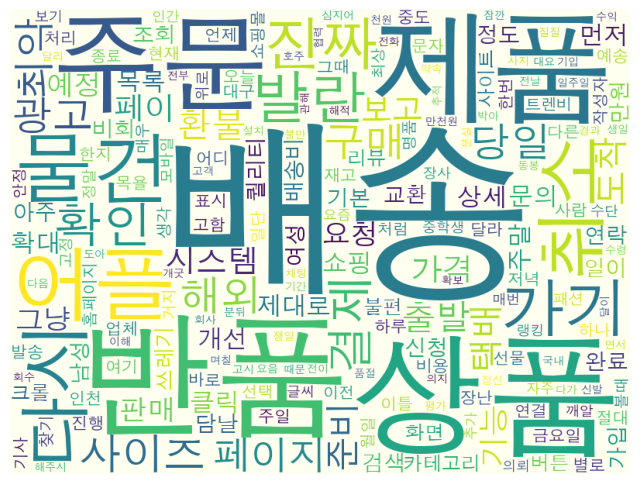

In [136]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(balaan_21_22_ux_dil_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [117]:
balaan_23 = balaan[balaan['date'].str.contains('2023')]

In [118]:
balaan_23_app = balaan_23[balaan_23["category"]=='앱 오류']

In [119]:
balaan_23_sat = balaan_23[balaan_23["category"]=='만족도&기타']

In [137]:
balaan_23_dil = balaan_23[balaan_23["category"]=='배송']

In [138]:
balaan_23_ux = balaan_23[balaan_23["category"]=='UX/UI 편의성']

In [139]:
balaan_23_dil_ux = pd.concat([balaan_23_dil, balaan_23_ux])

In [140]:
balaan_23_dil_ux

,platform,store,date,review,rating,category,label
30,balaan,google,20230912,배송이 좀 늦어져서 짜증낫었는데,5,배송,0
176,balaan,apple,20230824,오배송 건,1,배송,0
297,balaan,google,20230808,배송기간은 오버됐지만,5,배송,0
335,balaan,apple,20230801,당일출고 내뇽은 빼셔야겠어요,3,배송,0
336,balaan,apple,20230801,일반 배송보다 느려요,3,배송,0
368,balaan,google,20230726,가끔 기사님의 박력으로 택배상태가 안좋을때가 있는데 발란에서 잘 포장해주셔서 문제없...,5,배송,0
1637,balaan,google,20230427,뜯겨진 타브랜드스티커가 붙여진,1,배송,0
1971,balaan,google,20230402,반품교환 관련해서 수수료가 너무 비싸네요,2,배송,0
2136,balaan,google,20230213,믿고 구매하는 발란 배송만 쪼금 신경써서 부탁드려요,5,배송,0
2267,balaan,google,20230201,한가지 바람은 오늘도착상품 서비스지역이 늘어났으면 합니다,5,배송,0


In [120]:
balaan_23sur = pd.concat([balaan_23_app, balaan_23_sat])

In [141]:
balaan_23_dil_ux['review'] = balaan_23_dil_ux['review'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))

In [142]:
balaan_23_dil_ux_nouns = []
for cmt in balaan_23_dil_ux['review']:
    balaan_23_dil_ux_nouns.extend(okt.nouns(cmt)) #-- 명사만 추출
#-- 추출된 명사 중에서 길이가 1보다 큰 단어만 추출
balaan_23_dil_ux_nouns2 = []
word = [w for w in balaan_23_dil_ux_nouns if len(w) > 1]  
balaan_23_dil_ux_nouns2.extend(word)

In [143]:
balaan_23_dil_ux_nouns2

['배송',
 '짜증',
 '배송',
 '배송',
 '기간',
 '오버',
 '당일',
 '출고',
 '내뇽',
 '일반',
 '배송',
 '가끔',
 '기사',
 '박력',
 '택배',
 '상태',
 '발란',
 '포장',
 '문제',
 '브랜드',
 '스티커',
 '반품',
 '교환',
 '관련',
 '수수료',
 '구매',
 '발란',
 '배송',
 '쪼금',
 '신경',
 '한가지',
 '바람',
 '오늘',
 '도착',
 '상품',
 '서비스',
 '지역',
 '지방',
 '개인',
 '쇼핑',
 '스타일',
 '연관',
 '상품',
 '자동',
 '추천',
 '리뷰',
 '도움',
 '제발',
 '하단',
 '네비게이션',
 '빽키',
 '바로',
 '가지',
 '크롤',
 '다운',
 '서치',
 '버튼',
 '우측',
 '하단',
 '위로',
 '가기',
 '버튼',
 '옵션',
 '거지',
 '유저',
 '배려',
 '디자인',
 '심지어',
 '화면',
 '버튼',
 '카테고리',
 '존나',
 '어지러움',
 '서치',
 '화면',
 '파란',
 '배경',
 '흰색',
 '로고',
 '화면',
 '로딩',
 '스크린',
 '때문',
 '학생',
 '디자인',
 '의뢰',
 '크몽',
 '개발',
 '커뮤',
 '디자인',
 '신경',
 '사용',
 '불편',
 '불편',
 '가기',
 '스마트폰',
 '어플',
 '스마트폰',
 '상품',
 '사진',
 '설명',
 '확대',
 '진짜',
 '스마트폰',
 '어플',
 '모름',
 '직원',
 '테스트',
 '안함',
 '확대',
 '제품',
 '사진',
 '부족함',
 '수십',
 '만원',
 '고가',
 '상품',
 '사진',
 '몇장',
 '보고',
 '결정',
 '고객',
 '안내',
 '사항',
 '인지',
 '말씀',
 '판매',
 '발란',
 '불편',
 '얘기',
 '개선']

In [144]:
# Counter 객체 생성
balaan_23_dil_ux_count = Counter(balaan_23_dil_ux_nouns2)

In [145]:
max = 10
balaan_23_dil_ux_10 = {}
for word, counts in balaan_23_dil_ux_count.most_common(max):
    balaan_23_dil_ux_10[word] = counts
    print(f'{word} : {counts}')

배송 : 5
상품 : 4
발란 : 3
버튼 : 3
디자인 : 3
화면 : 3
불편 : 3
스마트폰 : 3
사진 : 3
신경 : 2


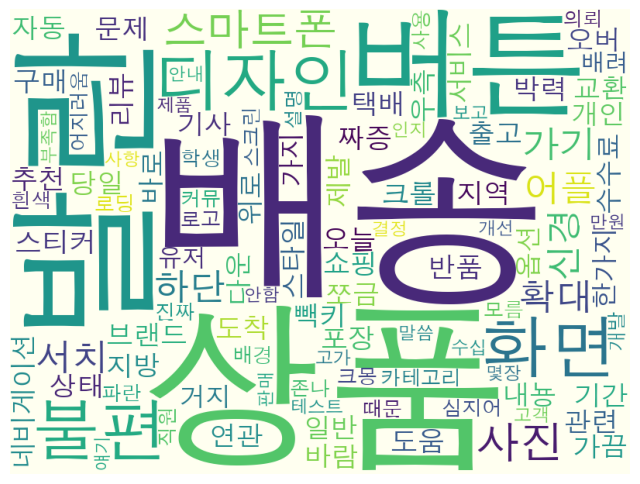

In [146]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(balaan_23_dil_ux_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()